In [2]:
import numpy as np
import matplotlib.pyplot as plt

from helpers.descriptors import Section

In [41]:
X = np.loadtxt("../../real_data/16_Archamps/process/sections_as_polylines/Meandre_1_reordered_2d_011.txt")

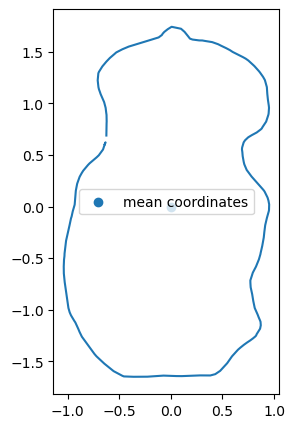

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X[:, 0], X[:, 1])
ax.scatter(np.mean(X, axis = 0)[0], np.mean(X, axis = 0)[1], label = "mean coordinates")
ax.set_aspect("equal")
ax.legend()

We calculate the centre of gravity by subdividing the n-gon into n-2 adjacent, non-overlapping triangles 

Letting $\mathbf{x} = [x_0, x_1, .., x_{n-1}]$ be the vector of ordered coordinate positions $x_i$ for the section n-gon.

Then we let $a_i = x_i - x_0$ be the vector between $x_0$ and $x_i$ for $i = 1, 2,...,n-1$

We can subdivide the n-gon into n-2 adjacent, non-overlapping triangles with coordinates:
$\{x_0; x_i; x_{i+1}\}$ for $i = 1, 2, ..., n-2$

We calculate average of all n-2 triangle centroids weighted by n-2 triangle areas.
$$G_i = \frac{1}{3} (x_0+x_i+x_{i+1}), \quad i = 1, 2, ..., n-2$$
$$w_i = \frac{1}{2} (a_i \times a_{i+1}), \quad i = 1, 2, ..., n-2$$

$$G_{\mathbf{x}} = \frac{\sum_{i=1}^{n-2}{G_i \times w_i}}{\sum_{i=1}^{n-2}{w_i}}$$

In [43]:
def CoG(s, verbose = False):
    n = len(s)
    # where s is the clockwise path determining the ngon by pairs of coordinates. 
    denominator = np.zeros(n-2)
    numerator = np.zeros((n-2, 2))
    
    # determinant method (see: https://math.stackexchange.com/questions/90463/how-can-i-calculate-the-centroid-of-polygon)
    u = s[1:-1] - s[0]
    v = s[2:] - s[0]
    
    dets = u[:, 0]* v[:, 1] - u[:, 1]*v[:, 0]
    centroids = (s[0]+s[1:-1]+s[2:]) / 3
    numerator = np.sum(np.multiply(np.expand_dims(dets, -1), centroids), axis = 0) 
    denominator = np.sum(dets)

    cog = numerator / denominator
    if verbose == True:
        print("estimated area",  np.abs(np.sum(u[:, 0]* v[:, 1] - u[:, 1]*v[:, 0]))/ 2)
    return cog

The area computation is performed by using the determinant method. 

Letting $\mathbf{x} = [x_0, x_1, .., x_{n-1}]$ be the vector of ordered coordinate positions $x_i$ for the section n-gon, 



In [44]:
def area(x):
    x1, x2 = x.T
    # use of triangles and determinants to compute the area. 
    return 0.5* np.abs(np.dot(x1,np.roll(x2,1))-np.dot(x2,np.roll(x1,1)))


In [45]:
G = CoG(X)
A = area(X)

[]

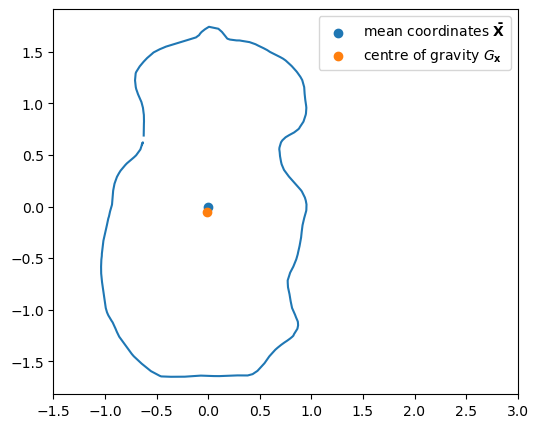

In [46]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(X[:, 0], X[:, 1])
ax.scatter(np.mean(X, axis = 0)[0], np.mean(X, axis = 0)[1], label = "mean coordinates $\\mathbf{\\bar{X}}$")
ax.scatter(G[0], G[1], label = "centre of gravity $G_{\\mathbf{x}}$")

ax.set_aspect("equal")
ax.legend()
ax.set_xlim(-1.5, 3)
plt.savefig("M:PostDoc/2024_ProjetsDivers/BenoitsThoughtsShapeConduit/CentreOfGravity.png", dpi = 300)
plt.plot()

In [47]:
# define Sigma as the covariance matrix of 
Sigma = 1 / A * (X-G).T @ (X-G)

$$\mathbf{\Sigma} = \mathbf{SDS^T}$$

where 
$$\mathbf{D} =
\begin{bmatrix} 
\sigma_1^2 & 0\\
0 &\sigma_2^2 \\
\end{bmatrix} $$

and 
$$
\mathbf{S} =
\begin{bmatrix}
u_1 & v_1\\
u_2 & v_2\\ 
\end{bmatrix} $$

with $\mathbf{u}$ and $\mathbf{v}$ being the eigenvectors of the covariance matrix, and $\sigma_1$ and $\sigma_2$ being the eigenvalues of this covariance matrix.

In [48]:
# the components are following. 
D, S =  np.linalg.eig(Sigma)
D = np.diag(D)

We can change from the original basis to the normal basis by:
$$\mathbf{\tilde{x}} = \mathbf{S}^T[\mathbf{x} - \mathbf{G}]$$ 

Expressed in the normal basis, the canonical ellipse equation, which has an aspect ratio equal to that of the eigenvalues $\sigma_1 / \sigma_2$, and scaled by a factor $\lambda$ is: 

$$\frac{\tilde{x_1}^2}{\lambda^2\sigma_1^2} + \frac{\tilde{x_2}^2}{\lambda^2\sigma_2^2} = 1$$

Noticing that $$\mathbf {D^{-1}} = \begin{bmatrix} 
\frac{1}{\sigma_1^2} & 0\\
0 & \frac{1}{\sigma_2^2} \\
\end{bmatrix} $$


The canonical equation can be summarised in matrix form as:

$$\mathbf{\tilde{x}}^T\mathbf{D^{-1}} \mathbf{\tilde{x}} = \lambda^2$$
$$ {\left(\mathbf{S}^T[\mathbf{x} - \mathbf{G}]\right)}^T\mathbf{D^{-1}}  \mathbf{S}^T[\mathbf{x}- \mathbf{G}] = \lambda^2$$

$$ [\mathbf{x} - \mathbf{G}]^T\mathbf{S}\mathbf{D^{-1}}  \mathbf{S}^T[\mathbf{x} - \mathbf{G}] = \lambda^2$$

But: 
$$ \mathbf{S}\mathbf{D^{-1}}  \mathbf{S}^T = \mathbf{\Sigma}^{-1}$$

Finally, this explains why points: 
$$ [\mathbf{x} - \mathbf{G}]^T\mathbf{\Sigma}^{-1}[\mathbf{x} - \mathbf{G}] = \lambda^2\quad\quad(1)$$ define an ellipse centered on G.

The area of such an ellipse with semi-major and semi-minor axes $\lambda\sigma_1$ and $\lambda\sigma_2$ respectively  is given by: $\pi \sigma_1\sigma_2\lambda^2$. Setting it equal to the area the bounded domain $|\Omega|$ and noticing that: $det\mathbf{\Sigma} = \sigma_1^2\sigma_2^2$

we get the following constraint on $\lambda$:

$$\lambda^2 = \frac{|\Omega|}{\pi \times \sqrt(det\mathbf{\Sigma})}$$



In [49]:
_lambda = np.sqrt(A  / (np.sqrt(np.linalg.det(Sigma))*np.pi))

For $t \in [0, 2\pi]$, any point $\mathbf{c} = [cos(t),  sin(t)]$ is on a unit circle and any point $\mathbf{\tilde{y}} = \lambda\sqrt{\mathbf{D}}\mathbf{c}$ sits on ellipse satisfying (1) in the normal basis.

$
\mathbf{y} =  \mathbf{S}\mathbf{\tilde{y}} + \mathbf{G}
$

sits on the ellipse centered on G, satisfying also (1), but in the original basis.

In [50]:
t = np.linspace(0,2*np.pi,500)

y = np.vstack((np.cos(t), np.sin(t)))
y_prime = (_lambda * S @ np.sqrt(D) @ y).T + G

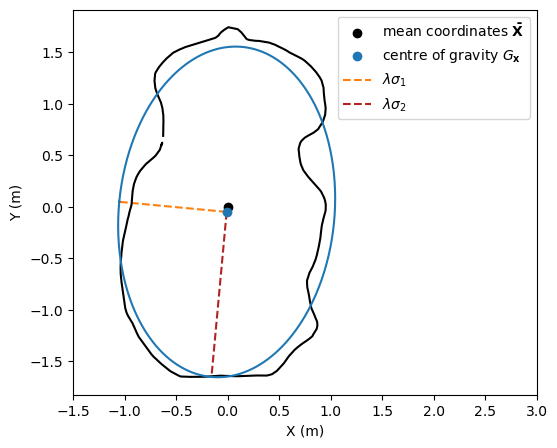

In [55]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(np.mean(X, axis = 0)[0], np.mean(X, axis = 0)[1], color = "k", label = "mean coordinates $\\mathbf{\\bar{X}}$")
ax.scatter(G[0], G[1], label = "centre of gravity $G_{\\mathbf{x}}$")

ax.set_aspect("equal")
ax.set_xlim(-1.5, 3)
plt.plot()
ax.plot(X[:, 0], X[:, 1], color = "black")
ax.plot(y_prime[:,0], y_prime[:,1], color = "C0")
ax.plot([G[0], y_prime[0,0]], [G[1], y_prime[0,1]], ls = "--", color = "C1", zorder = -5,  label = "$\\lambda\\sigma_1$")
ax.plot([G[0], y_prime[125,0]], [G[1], y_prime[125,1]], ls = "--", color = "firebrick", zorder = -5, label = "$\\lambda\\sigma_2$")
ax.legend()
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")

plt.savefig("M:PostDoc/2024_ProjetsDivers/BenoitsThoughtsShapeConduit/CentreOfGravity.png", dpi = 300)

ax.set_aspect("equal")

We can double check that the computed ellipse has the desired area property.

In [70]:
area(y_prime)

2.8473031099739945

In [71]:
A

2.847378350033587